In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from divtel.telescope import Telescope, Array

In [2]:
#La Palma baseline array
file = open("../config/layout-3AL4M15-5.txt", "r")
#array = Array()
tels = []
for line in file:  
    #split the string on whitespace, return a list of numbers as strings
    coord_str = line.split()
    coord_str[0], coord_str[1], coord_str[2] = float(coord_str[0]), float(coord_str[1]), float(coord_str[2]) 
    coord = [x*u.m for x in coord_str]
    #print(coord_float)
    tel = Telescope(coord[0],coord[1],coord[2],coord[3],coord[4])
    tels.append(tel)
    
array = Array(tels)

for tel in array.telescopes:
    #print(tel.fov)
    print(tel.id)
    #print(tel.position)
    #print(tel.camera_radius)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [3]:
#Define where you want to point (ex. source in the simulation)
az = 180 * u.deg
alt = 70 * u.deg
#Define divergence
div=0.005

#Divergent part
np.array(array.divergent_pointing(div, alt, az))
tels_alt = np.array([tel.alt.value for tel in array.telescopes])
tels_az = np.array([tel.az.value for tel in array.telescopes])
print("Az: ", np.degrees(tels_az))
print("Alt: ", np.degrees(tels_alt))
#print("barycenter: ", array.barycenter)

#Add 360deg to negative Az value
#THIS CAN BE ELIMINATED NOW...we should check with the simulations
for k, i in enumerate(tels_az):
    #print(i)
    if i < 0:
        az_new = i + np.radians(360)
    else:
        az_new = i
    tels_az[k] = az_new
print(tels_az)
print("Az: ", np.degrees(tels_az))

telescopes_distances = np.sqrt(np.sum((array.positions_array - array.barycenter)**2, axis=1))
p = np.average(array.pointing_vectors, weights=telescopes_distances, axis=0)
print(np.degrees(p))

Az:  [-179.71659537  179.28876227  179.41096855 -179.6061931   179.80341061
  178.3794808   178.15517965  179.11890929 -178.60992723 -178.56997041
 -178.77621118  177.08149345 -177.16293643 -177.39409503  179.84520757
  177.09999429  178.80404458 -179.51877379 -177.43038654]
Alt:  [70.01983104 70.10399817 70.39993408 70.28363776 69.64958574 69.70786891
 70.24501282 70.65071937 70.52561727 70.0009128  69.64706026 69.88778154
 70.26208799 69.69513288 70.19759139 69.32056251 69.29434347 69.24173946
 70.74308301]
[3.146539   3.12917921 3.13131212 3.14846588 3.13816152 3.11330926
 3.10939446 3.12621472 3.165854   3.16655138 3.1629518  3.09065511
 3.19110875 3.18707428 3.13889102 3.09097801 3.12071929 3.14999164
 3.18644087]
Az:  [180.28340463 179.28876227 179.41096855 180.3938069  179.80341061
 178.3794808  178.15517965 179.11890929 181.39007277 181.43002959
 181.22378882 177.08149345 182.83706357 182.60590497 179.84520757
 177.09999429 178.80404458 180.48122621 182.56961346]
[-1.96210297e+

In [17]:
tels_alt

array([1.22207659, 1.22354559, 1.22871064, 1.22668089, 1.21561459,
       1.21663183, 1.22600676, 1.23308767, 1.23090423, 1.22174641,
       1.21557052, 1.21977189, 1.22630477, 1.21640954, 1.2251791 ,
       1.20987206, 1.20941445, 1.20849633, 1.23469972])

(-403.9535, 233.2435, -342.2205, 419.2105)

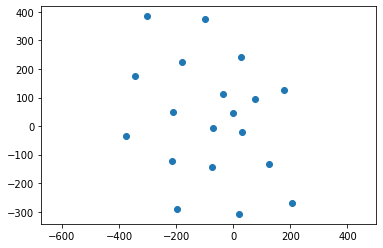

In [4]:
#array layout plot
plt.scatter(array.positions_array[:,0], array.positions_array[:,1])
plt.axis('equal')

(-342.2205, 419.2105, -403.9535, 233.2435)

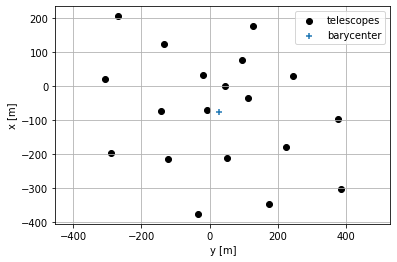

In [5]:
#2D display
ax = array.display_2d(projection='xy')
ax.legend()
plt.axis('equal')

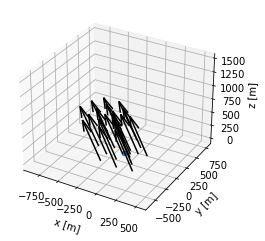

In [6]:
#3D display
ax = array.display_3d()
fig = ax.scatter(array.barycenter[0], array.barycenter[1], array.barycenter[2])
#plt.savefig("3d_0.png")

In [7]:
#tel dictionary with div pointing
tels_dict = {}
point_az_dict = {}
point_alt_dict = {}

for tel_id, tel in enumerate(array.telescopes, 1):
    #tels_dict[ii] = {'THETA': 90-np.rad2deg(tel.alt.value),
    #                 'PHI': np.rad2deg(np.mod(tel.az.value, 2*np.pi))}
    tels_dict[tel_id] = {'az': tel.az,
                     'alt': tel.alt}
    point_az_dict[tel_id] = tel.az.value * u.rad
    point_alt_dict[tel_id] = tel.alt.value * u.rad

In [13]:
CTA_INFO

NameError: name 'CTA_INFO' is not defined

In [15]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.time import Time

#print(tels_az)

location = EarthLocation.of_site('Roque de los Muchachos')
obstime = Time('2013-11-01T03:00')
altaz = AltAz(location=location, obstime=obstime)

#Define pointing as a SkyCoord object
tels_pointing = SkyCoord(alt=tels_alt,az=tels_az, frame=altaz, unit='rad')
#print(tels_pointing)

array_pointing = SkyCoord(alt=70, az=180, frame=altaz, unit='deg')
#print(array_pointing)

icrs_point = tels_pointing.transform_to(ICRS())
#print(tels_pointing.transform_to(ICRS()))

#gal_point = tels_pointing.galactic
#print(fk5_point)


In [16]:
icrs_point

<SkyCoord (ICRS): (ra, dec) in deg
    [(67.39553017, 8.74901571), (67.73835567, 8.83474767),
     (67.69314448, 9.1302082 ), (67.35864254, 9.01298011),
     (67.56310502, 8.37885994), (68.06203854, 8.44472771),
     (68.12442711, 8.98384308), (67.788568  , 9.38222074),
     (67.02331169, 9.25912925), (66.9987367 , 8.73478937),
     (67.06377667, 8.37961856), (68.50839357, 8.64084183),
     (66.52337131, 9.01100832), (66.57995745, 8.44127079),
     (67.54636404, 8.92682836), (68.52841715, 8.0739057 ),
     (67.92148586, 8.02786529), (67.32230295, 7.97121626),
     (66.63352919, 9.48800232)]>

In [12]:
altaz

<AltAz Frame (obstime=2013-11-01T03:00:00.000, location=(5327448.9957829, -1718665.73869569, 3051566.90295403) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [10]:
icrs_point

<SkyCoord (ICRS): (ra, dec) in deg
    [(67.39553017, 8.74901571), (67.73835567, 8.83474767),
     (67.69314448, 9.1302082 ), (67.35864254, 9.01298011),
     (67.56310502, 8.37885994), (68.06203854, 8.44472771),
     (68.12442711, 8.98384308), (67.788568  , 9.38222074),
     (67.02331169, 9.25912925), (66.9987367 , 8.73478937),
     (67.06377667, 8.37961856), (68.50839357, 8.64084183),
     (66.52337131, 9.01100832), (66.57995745, 8.44127079),
     (67.54636404, 8.92682836), (68.52841715, 8.0739057 ),
     (67.92148586, 8.02786529), (67.32230295, 7.97121626),
     (66.63352919, 9.48800232)]>

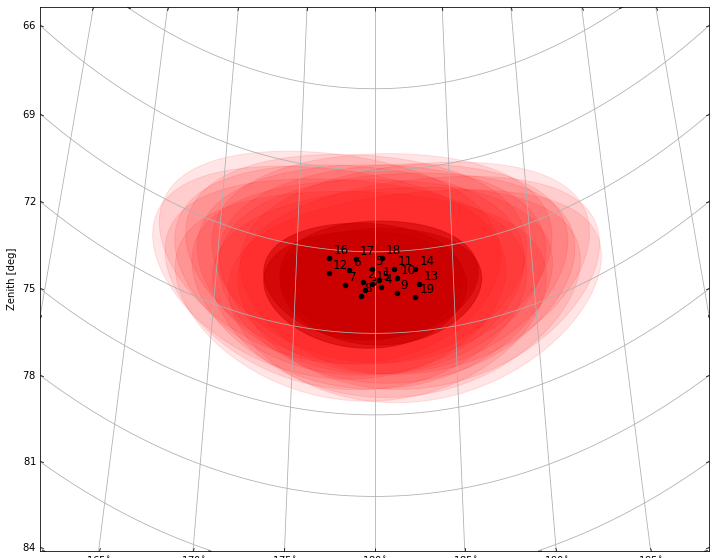

In [11]:
#WORKING
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

# PolarAxes.PolarTransform takes radian. However, we want our coordinate
# system in degree
tr = Affine2D().scale(np.pi/180., 1.).translate(+np.pi/2.,0) + PolarAxes.PolarTransform()

# polar projection, which involves cycle, and also has limits in
# its coordinates, needs a special method to find the extremes
# (min, max of the coordinate within the view).

# 20, 20 : number of sampling points along x, y direction
n = 20
extreme_finder = angle_helper.ExtremeFinderCycle(10, 10,
                                                 lon_cycle=360,
                                                 lat_cycle=None,
                                                 lon_minmax=None,
                                                 lat_minmax=(-90, 90),
                                                 )

grid_locator1 = angle_helper.LocatorDMS(12)
# Find a grid values appropriate for the coordinate (degree,
# minute, second).

tick_formatter1 = angle_helper.FormatterDMS()
# And also uses an appropriate formatter.  Note that,the
# acceptable Locator and Formatter class is a bit different than
# that of mpl's, and you cannot directly use mpl's Locator and
# Formatter here (but may be possible in the future).

grid_helper = GridHelperCurveLinear(tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1
                                    )

fig = plt.figure(figsize=(12,10))
fig.clf()
ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

# make ticklabels of right and top axis visible.
ax1.axis["right"].major_ticklabels.set_visible(False)
ax1.axis["top"].major_ticklabels.set_visible(False)
ax1.axis["bottom"].major_ticklabels.set_visible(True)

# let right axis shows ticklabels for 1st coordinate (angle)
#ax1.axis["right"].get_helper().nth_coord_ticks = 0
# let bottom axis shows ticklabels for 2nd coordinate (radius)
#ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

fig.add_subplot(ax1)
# A parasite axes with given transform
ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
# note that ax2.transData == tr + ax1.transData
# Anything you draw in ax2 will match the ticks and grids of ax1.
ax1.parasites.append(ax2)

for i, tel in enumerate(array.telescopes, 1):
    tel_alt = tel.alt
    tel_az = tel.az
    tels_points = SkyCoord(alt=tel.alt.value,az=tel.az.value, frame=altaz, unit='rad')
    x = tels_points.az.degree
    y = tels_points.alt.degree
    #print(x)
    if i <= 4:
        r = SphericalCircle((x * u.deg, y * u.deg), tel.camera_radius * u.degree, color='black', alpha=0.5, transform=ax2.transData)
    else:
        r = SphericalCircle((x * u.deg, y * u.deg), tel.camera_radius * u.degree, color='r', alpha=0.1, transform=ax2.transData)
    ax1.add_patch(r)
    ax2.annotate(i, (x, y), fontsize=12, xytext=(4, 4), textcoords='offset pixels', zorder=10)
    ax1.scatter(x, y, c = "black", s=20, transform=ax2.transData, zorder=10)

ax1.set_xlim(-26,26)
ax1.set_ylim(-80, -60)
#ax1.set_xlim(-181, 181)
#ax1.set_ylim(-91, 91)
ax1.set_aspect(1.)

ax1.grid(True)
ax1.set_xlabel("Azimuth [deg]", fontsize=20)
ax1.set_ylabel("Zenith [deg]", fontsize=20)


#plt.savefig("skymap_div{}.png".format(div))
plt.show()


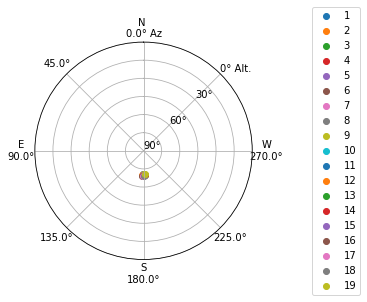

In [18]:
#SKYMAP
from astroplan.plots import plot_sky
from astroplan import FixedTarget
from astroplan import Observer

for ii, tel in enumerate(icrs_point, 1):
    #print(tel.ra)
    point = SkyCoord(ra=tel.ra, dec=tel.dec)
    target = FixedTarget(coord=point, name=ii)
    #print(target.coord)
    location = EarthLocation.of_site('Roque de los Muchachos')
    observer = Observer(location=location, name="Roque")
    observe_time = Time('2013-11-01T03:00')
    plot_sky(target, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
#plt.savefig("astroplan_skymap_div{}.png".format(div))

plt.show()

<PolarAxesSubplot:>

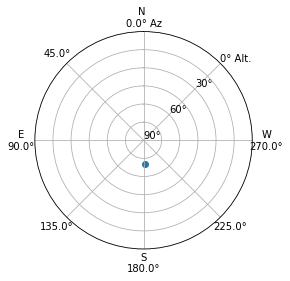

In [22]:
plot_sky(target, observer, observe_time)

In [20]:
observer = Observer(location=location, name="Roque")

In [21]:
observer

<Observer: name='Roque',
    location (lon, lat, el)=(-17.879999999999995 deg, 28.758333333333336 deg, 2326.999999998442 m),
    timezone=<UTC>>

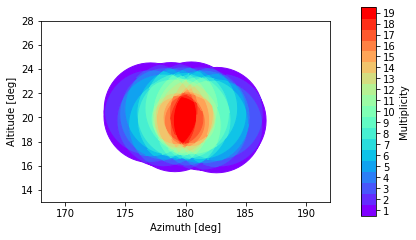

7.396429691695296 27.5978108617125 5.25336186281818
102.12591251358441


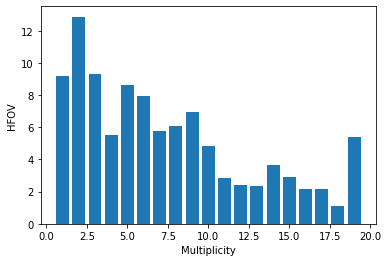

In [19]:
from descartes import PolygonPatch
from shapely.ops import unary_union, polygonize
from shapely.geometry import mapping, Polygon, Point, LineString

polygons = {}
for ii, tel in enumerate(array.telescopes, 1):
    #if ii < 5: #LST only
    #if ii > 4: #MST only
    if ii > 0: #all
        tel_alt = tel.alt
        tel_az = tel.az
        tels_points = SkyCoord(alt=tel.alt.value,az=tel.az.value, frame=altaz, unit='rad')
        polygons[ii-1] = Point(tels_points.az.degree, 90-tels_points.alt.degree).buffer(tel.camera_radius)

#for ii, tel in enumerate(tels_pointing, 1):
    #polygons[ii-1] = Point(tel.az.degree, 90-tel.alt.degree).buffer(7.7/2)
#print(polygons)

xrange = [168, 192]
yrange = [13, 28]

rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
     dict_count_overlaps[i] = 0
     for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
             dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())
#print(max_multiplicity)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
bounds = np.arange(max_multiplicity + 1) + 1

fig = plt.figure()
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

fig.subplots_adjust(top=0.85)

for pol_id, pol in result.items():
     colore = dict_count_overlaps[pol_id]
     ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
     )

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                label='Multiplicity')
cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5)
cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect(1)
#plt.savefig("multiplicity_plot_all_div{}.png".format(div))
#plt.savefig("multiplicity_plot_MST_div{}.png".format(div))
#plt.savefig("multiplicity_plot_LST_div{}.png".format(div))

plt.show()

hfov = []
for patchsky in res:
     hfov.append(patchsky.area)
     #print(patchsky.area)

hfov = np.array(hfov)
# multiplicity associated with each patch
overlaps = np.array(list(dict_count_overlaps.values()))
average_overlap = np.average(overlaps, weights=hfov)
variance = np.average((overlaps-average_overlap)**2, weights=hfov)
print(average_overlap, variance, np.sqrt(variance))
print(hfov.sum())
plt.figure()
plt.bar(list(set(overlaps)), [hfov[overlaps==i].sum() for i in set(overlaps)])
plt.ylabel('HFOV')
plt.xlabel('Multiplicity')
#plt.savefig("multiplicity_chart_all_div{}.png".format(div))
#plt.savefig("multiplicity_chart_MST_div{}.png".format(div))
#plt.savefig("multiplicity_chart_LST_div{}.png".format(div))

plt.show()

In [ ]:
#create  simtel cfg file
filename = 'CTA-ULTRA6-LaPalma-div{}.cfg'.format(div)
with open(filename, 'w') as f:
    f.write("""#ifndef TELESCOPE
# define TELESCOPE 0
#endif\n
#if TELESCOPE == 0\n""")
    f.write('   TELESCOPE_THETA={:.2f} \n'.format(90 - array_pointing.alt.value))
    f.write('   TELESCOPE_PHI={:.2f} \n'.format(array_pointing.az.value))
    f.write("""\n% Global and default configuration for things missing in telescope-specific config.
# include <CTA-ULTRA6-LST.cfg>\n""")
    for n, tel in enumerate(tels_pointing, 1):
        zd = 90 - tel.alt.value
        f.write('\n#elif TELESCOPE == {:d}\n'.format(n))
        if n <= 4:
            f.write('#  include <CTA-ULTRA6-LST.cfg>\n')
        else:
            f.write('#  include <CTA-ULTRA6-MST-NectarCam.cfg>\n')
        f.write('   TELESCOPE_THETA={:.2f}\n'.format(zd))
        f.write('   TELESCOPE_PHI={:.2f}\n'.format(tel.az.value))
    f.write("""
#else\n
    Error Invalid telescope for CTA-ULTRA6 La Palma configuration.\n
#endif\n
trigger_telescopes = 2 % In contrast to Prod-3 South we apply loose stereo trigger immediately
array_trigger = array_trigger_ultra6_diver-test.dat""")
f.close()


In [ ]:
#check cfg file
with open(filename, 'r') as f:
        print(f.read())